In [1]:
import uproot
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
from matplotlib import rc

# plt.rcParams['text.usetex'] = True
pd.set_option('use_inf_as_na', False)


def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)

    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Welcome to JupyROOT 6.22/02


In [2]:
filenames_e=[
            "/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec_v3/output*.root",\
            "/work/as17540/PhaseSpaces/PhS2_10x10_p1_Elec_v2/output*GateMaterials_SeaLevel.db.root"
]


data_frame_dict={}

for files_g in filenames_e:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume'])
    #This creates a set of dataframes for each files as it iterates through the * wildcards
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
    #The concat method then stitches all the pandas data frames for each file together into one data frame
    #which is then stored in a dictionary, accessed by the the key files_g, whatever the filename is

/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec_v3/output*.root   

/work/as17540/PhaseSpaces/PhS2_10x10_p1_Elec_v2/output*GateMaterials_SeaLevel.db.root   



/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec_v3/output*.root
/work/as17540/PhaseSpaces/PhS2_10x10_p1_Elec_v2/output*GateMaterials_SeaLevel.db.root


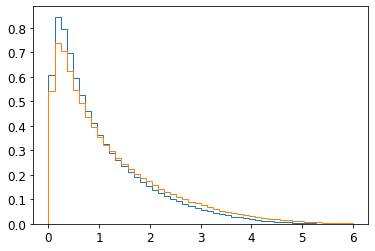

In [10]:
for files_g in filenames_e:
    df=data_frame_dict[files_g]
    print(files_g)
    _=plt.hist(df['Ekine'],bins=50,range=(0,6),density=True,histtype="step")